In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.7 MB/s eta 0:00:00


In [2]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [6]:
!pip install qiskit qiskit-aer matplotlib -q

In [7]:
!pip install qiskit qiskit-aer

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
import numpy as np

# ✅ Guaranteed working histogram (never blank)
def plot_counts(counts, title="Histogram"):
    labels = sorted(counts.keys())
    values = [counts[k] for k in labels]

    plt.figure(figsize=(6,4))
    plt.bar(range(len(labels)), values)
    plt.xticks(range(len(labels)), labels)
    plt.xlabel("Measured Output")
    plt.ylabel("Counts")
    plt.title(title)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.show()

In [8]:
def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))

    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    qc.x(range(n))
    qc.h(range(n))

In [9]:
def run(qc, shots=1024, title="Result"):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=shots).result()
    counts = result.get_counts()
    plot_counts(counts, title)
    print("Counts:", counts)

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


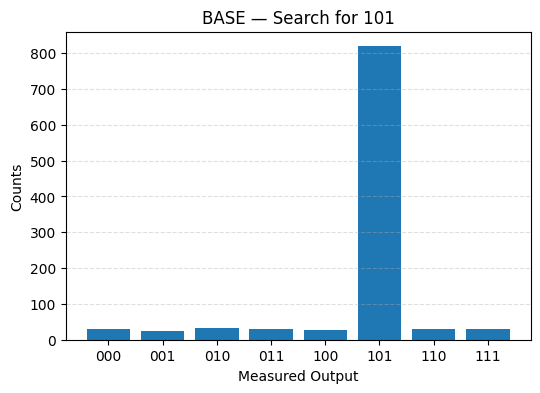

Counts: {'001': 24, '100': 28, '011': 30, '111': 30, '110': 30, '010': 34, '000': 29, '101': 819}


In [10]:
def grover_3qubit(marked_state="101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))  # initialization
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_3qubit("101")
print(qc.draw())
run(qc, title="BASE — Search for 101")

# **Task 1 : Change the marked state**


Searching for: 111


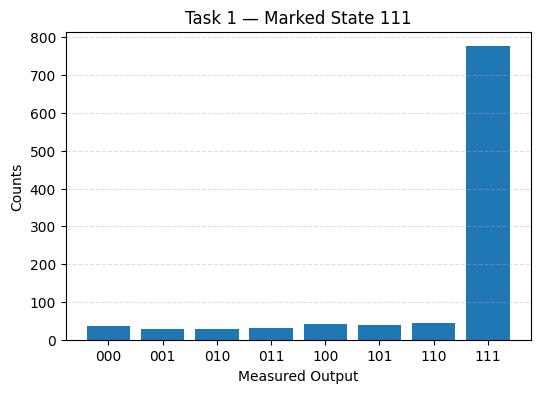

Counts: {'101': 39, '110': 44, '100': 41, '001': 29, '010': 28, '000': 37, '011': 30, '111': 776}

Searching for: 010


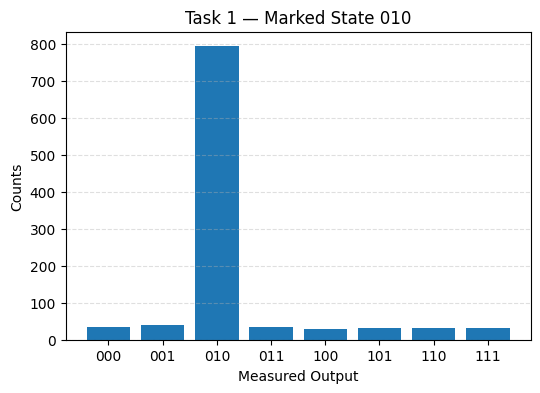

Counts: {'001': 39, '110': 31, '100': 28, '011': 35, '111': 33, '101': 31, '000': 34, '010': 793}


In [11]:
for state in ["111", "010"]:
    print("\nSearching for:", state)
    qc = grover_3qubit(state)
    run(qc, title=f"Task 1 — Marked State {state}")

In [12]:
# **Task 2: Modify the number of qubits**

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                             0  1  2  3 


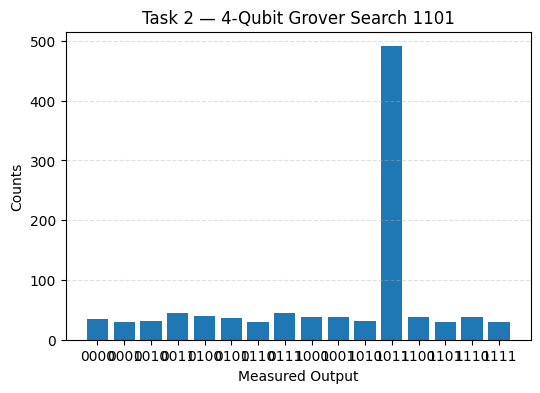

Counts: {'0001': 29, '1100': 38, '0100': 40, '1011': 491, '0111': 45, '0011': 44, '1010': 31, '0000': 35, '0010': 32, '1111': 30, '1110': 38, '1101': 30, '0110': 29, '1000': 38, '0101': 36, '1001': 38}


In [13]:
def grover_4qubit(marked_state="1101"):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc = grover_4qubit("1101")
print(qc.draw())
run(qc, title="Task 2 — 4-Qubit Grover Search 1101")

In [14]:
# **Task 3: Add multiple iterations**

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               »
«q_0: ┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──»
«     ├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  »
«q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────

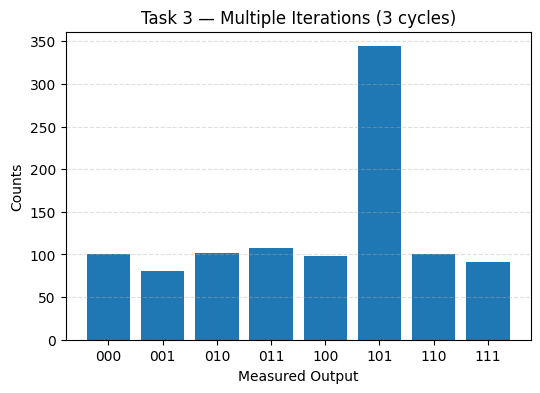

Counts: {'001': 81, '010': 102, '000': 100, '110': 100, '100': 98, '011': 108, '111': 91, '101': 344}


In [15]:
def grover_iterations(marked_state="101", iterations=2):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    qc.measure(range(n), range(n))
    return qc

qc = grover_iterations("101", iterations=3)
print(qc.draw())
run(qc, title="Task 3 — Multiple Iterations (3 cycles)")

In [16]:
# **Task 4: Circuit Visualization**

In [17]:
%matplotlib inline

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
import matplotlib.pyplot as plt

def oracle(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

# --- Run Grover ---
marked_state = "101"
qc = grover_search(marked_state)

# ✅ Draw using SAFE universal drawer (NO LaTeX, NO errors)
print(circuit_drawer(qc, output="text"))

# --- Simulate ---
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=2048).result()

counts = result.get_counts()
print("\nCounts =", counts)

plot_histogram(counts)
plt.show()

     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 

Counts = {'110': 74, '000': 56, '010': 60, '011': 64, '111': 74, '100': 81, '001': 74, '101': 1565}


In [18]:
# **Task 5: Experiment with Noise**

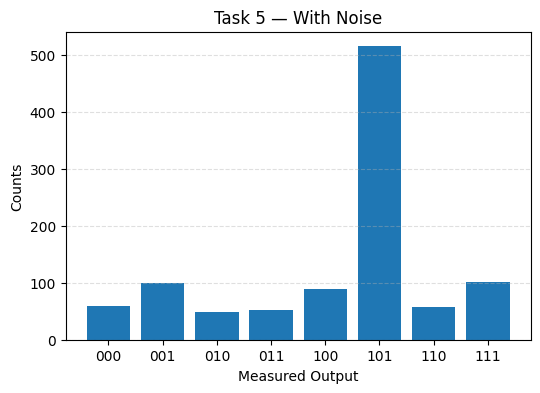

Counts: {'110': 58, '100': 89, '000': 60, '010': 48, '011': 53, '111': 102, '101': 515, '001': 99}


In [22]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

def run_with_noise(qc):
    noise = NoiseModel()
    noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h','x'])
    noise.add_all_qubit_quantum_error(depolarizing_error(0.10, 2), ['mcx'])

    sim = AerSimulator(noise_model=noise)
    tqc = transpile(qc, sim)

    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    plot_counts(counts, "Task 5 — With Noise")
    print("Counts:", counts)

qc = grover_3qubit("101")
run_with_noise(qc)

In [21]:

# **Task 6: Real Hardware Execution (Optional)**

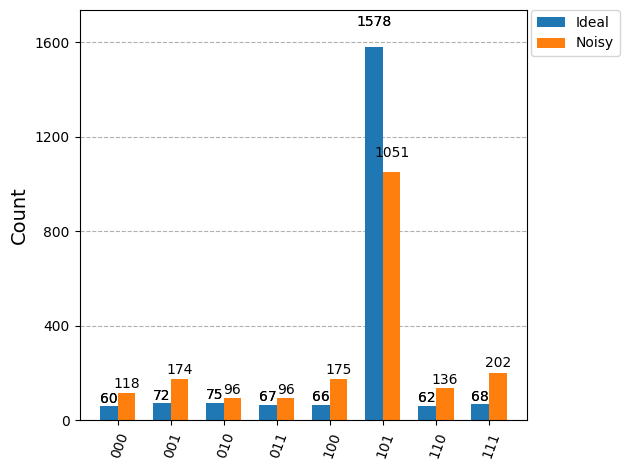

In [23]:
from qiskit import transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, depolarizing_error

sim_ideal = Aer.get_backend('qasm_simulator')

# Ideal run (no noise)
tqc_ideal = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(tqc_ideal, shots=2048).result()
counts_ideal = result_ideal.get_counts()

# Noisy run
noise = NoiseModel()
noise.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['h','x'])
noise.add_all_qubit_quantum_error(depolarizing_error(0.10, 2), ['mcx'])

sim_noisy = AerSimulator(noise_model=noise)
tqc_noisy = transpile(qc, sim_noisy)
result_noisy = sim_noisy.run(tqc_noisy, shots=2048).result() # Using 2048 for consistency with ideal run
counts_noisy = result_noisy.get_counts()

# Compare
plot_histogram([counts_ideal, counts_noisy], legend=['Ideal', 'Noisy'])